In [2]:
# Final_Samples
import pandas as pd
import numpy as np
import json
import random
usable_samples_ADNI = json.load(open('./usable_samples_ADNI.json'))
PRS_orig_feature_matrix = np.load('./PRS_feature_matrix.npy').astype(np.float32)
PRS_orig_feature_matrix = (PRS_orig_feature_matrix - PRS_orig_feature_matrix.mean(0))/PRS_orig_feature_matrix.std(0)
print( PRS_orig_feature_matrix.shape[1], len(usable_samples_ADNI) )
num_features=PRS_orig_feature_matrix.shape[1]
print(num_features)

51 1816
51


In [25]:
adnimerge = pd.read_csv("ADNIMERGE.csv")
# print( adnimerge.head() )

adnimerge = adnimerge[['PTID', 'DX_bl', 'DX', 'Years_bl']]
# print( adnimerge.head() )

# print( adnimerge['DX'].value_counts() )
adnimerge['DX_bl'] = adnimerge['DX_bl'].replace(['CN', 'LMCI', 'EMCI', 'SMC'], 'Non-Dementia')
adnimerge['DX_bl'] = adnimerge['DX_bl'].replace(['AD'], 'Dementia')
adnimerge['DX'] = adnimerge['DX'].replace(['CN', 'MCI', None ], 'Non-Dementia')

# print( adnimerge['DX'].value_counts() )

adnimerge = adnimerge.sort_values(['PTID', 'Years_bl']).drop_duplicates(['PTID'], keep='last')
# print(adnimerge)
adnimerge = adnimerge[ adnimerge['Years_bl'] > 2 ]
adnimerge = adnimerge[ adnimerge['DX_bl']== 'Non-Dementia' ]
print( adnimerge['DX'].value_counts() )


Non-Dementia    1129
Dementia         215
Name: DX, dtype: int64


In [50]:
num_features = 34

In [51]:
PRS_feature_matrix = PRS_orig_feature_matrix
PRS_feature_matrix = PRS_feature_matrix[:, :num_features]
print(PRS_feature_matrix.shape)

(1816, 34)


In [52]:
df = pd.read_csv('./COVAR_FILE_bigger_dataset.txt', ' ') 
print("shape",df.shape)
print( df[['AGE', 'PTGENDER']].shape, df[['AGE', 'PTGENDER']].dropna().shape )
print( df.head() ) # PC - Principal Component

shape (1817, 14)
(1817, 2) (1817, 2)
                FID               IID       PC1       PC2       PC3       PC4  \
0  ADNI3_036_S_6231  ADNI3_036_S_6231 -0.006724 -0.010617  0.001596 -0.000460   
1  ADNI3_006_S_6277  ADNI3_006_S_6277 -0.010432 -0.010269  0.012757  0.006921   
2  ADNI3_129_S_6146  ADNI3_129_S_6146 -0.004919 -0.011656 -0.035521  0.064641   
3  ADNI3_033_S_6352  ADNI3_033_S_6352 -0.014069 -0.010279  0.020014  0.053023   
4  ADNI3_027_S_6183  ADNI3_027_S_6183 -0.010766 -0.012370 -0.010960  0.029830   

        PC5       PC6       PC7       PC8       PC9      PC10  PTGENDER   AGE  
0 -0.013131 -0.005855 -0.005142 -0.009063 -0.001739 -0.012863         1  69.1  
1 -0.014958 -0.005860 -0.027775 -0.009632  0.054966  0.087390         1  70.7  
2  0.012094  0.003860  0.035955  0.006561  0.019736 -0.023304         1  65.5  
3  0.023691  0.000247 -0.002273 -0.030627 -0.053461  0.049984         0  71.4  
4 -0.019520 -0.001955  0.023844  0.079138  0.002207  0.008892         0  65.

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.


In [ ]:
df['AGE'].value_counts()

# The value counts show that there is not age with 0 value in the covar file

In [54]:
print( len( usable_samples_ADNI ) )
print( type( usable_samples_ADNI ) )

rev_dict = {}
  
for key, value in usable_samples_ADNI.items():
    rev_dict.setdefault(value, set()).add(key)
      
result = [key for key, values in rev_dict.items()
                              if len(values) > 1]
  
# printing result
print( len( rev_dict ) )
print("duplicate values", str(result))

1816
<class 'dict'>
1816
duplicate values []


* The cell below prints out the mismatched IID of both covar file and usable samples ADNI

In [59]:
print( df['IID'].nunique() )
# print( usable_samples_ADNI.keys() )

notFoundIndex = []
for sample in usable_samples_ADNI:
    if len( df[df['IID'] == sample].index ) == 0 :
        notFoundIndex.append(sample)
#     print(df[df['IID'] == sample].index[0])
#     foundIndex.append( df[df['IID'] == sample].index[0] )
#     if sample in df['IID']:
#         print("exists")
#     else:
#         print("doesn't exist")
print( len( notFoundIndex ) )

notFoundInSamples = []
for item in df['IID'] :
    if item not in usable_samples_ADNI.keys():
        notFoundInSamples.append(item)
print( len(notFoundInSamples ) )

notFoundInSamples.sort()
notFoundIndex.sort()

for i in range( len(notFoundIndex ) ):
    print(notFoundIndex[i], notFoundInSamples[i])

1817
234
235
159_021_S_2124 100_094_S_2201
163_019_S_4367 101_068_S_2171
168_094_S_2201 102_114_S_0166
177_116_S_4010 104_041_S_4004
185_941_S_2060 105_033_S_0922
196_037_S_0454 105_067_S_2301
198_003_S_2374 105_127_S_4500
210_036_S_0673 107_129_S_4220
222_123_S_2055 108_032_S_0677
222_141_S_0915 10_073_S_2264
239_153_S_4372 110_941_S_2060
249_094_S_4089 111_019_S_4293
253_073_S_2225 112_098_S_4215
256_116_S_4199 113_073_S_4393
25_072_S_2164 114_019_S_4367
263_029_S_4307 116_128_S_2130
263_072_S_1380 117_033_S_4505
268_068_S_4217 118_073_S_4312
268_141_S_1004 119_068_S_4174
26_052_S_1346 11_094_S_2216
26_128_S_0522 120_114_S_1106
270_067_S_2301 121_072_S_2027
276_073_S_4393 122_011_S_2274
289_023_S_0126 124_029_S_4307
290_098_S_4215 126_123_S_0072
293_002_S_4229 127_009_S_2208
296_029_S_0914 128_130_S_0232
298_021_S_0178 129_012_S_4012
300_128_S_2130 12_021_S_0337
305_032_S_0677 130_014_S_0519
309_036_S_2380 131_067_S_4054
313_068_S_4340 132_130_S_2391
313_099_S_4022 133_027_S_0835
315

NO DUPLICATE VALUE IN usable_samples_ADNI

NO DUPLICATE VALUE IN IID of covar_file_bigger_dataset

In [32]:
import numpy as np
import pandas as pd
AGE_GENDER_PTID_map = pd.read_csv('../larger_dataset/ADNIMERGE.csv')[['PTID', 'PTGENDER', 'AGE']]
AGE_GENDER_PTID_map['PTGENDER'] = (AGE_GENDER_PTID_map['PTGENDER'] == 'Female').astype(int)
AGE_GENDER_PTID_map

C:\Users\HP\AppData\Local\Temp\ipykernel_11884\2969402204.py:3: DtypeWarning: Columns (18,19,20,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  AGE_GENDER_PTID_map = pd.read_csv('../larger_dataset/ADNIMERGE.csv')[['PTID', 'PTGENDER', 'AGE']]


,PTID,PTGENDER,AGE
0,011_S_0002,0,74.3
1,011_S_0003,0,81.3
2,011_S_0003,0,81.3
3,011_S_0003,0,81.3
4,011_S_0003,0,81.3
...,...,...,...
15117,021_S_6896,0,64.8
15118,035_S_4464,0,70.4
15119,041_S_5097,0,67.5
15120,027_S_5288,1,81.9


In [33]:
# COVAR_FILE = df.to_numpy()[:, 2:].astype(np.float32)
cnt = 0
print("shape1",PRS_feature_matrix.shape)
FEATURE_MATRIX = np.concatenate([PRS_feature_matrix, np.zeros([PRS_feature_matrix.shape[0], 12])], 1).astype(np.float32)
print("shape2",FEATURE_MATRIX.shape)
for sample in usable_samples_ADNI:
    covar = df[df['IID'] == sample].to_numpy()[:, 2:].astype(np.float32) # taking from the PCs, skipping the first two columns of IID, FID
#     print(covar)
    #     if cnt < 2:
#         print(covar)
#     print(covar.shape)
    if covar.shape[0] != 1:
#         print(sample)
        cnt += 1
        continue
    FEATURE_MATRIX[usable_samples_ADNI[sample],num_features:] = covar
# cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]
# print("Feature Matrix")
# print(FEATURE_MATRIX[0])
print(covar[0])
print("samples: ", usable_samples_ADNI[sample])
# FEATURE_MATRIX[usable_samples_ADNI[sample], num_features:] = covar # naeem's modification
print("Feature Matrix")
print(FEATURE_MATRIX[:2])
# cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]

shape1 (1816, 34)
shape2 (1816, 46)
[ 7.42901e-02 -1.11187e-02  2.98971e-02 -4.29416e-03  4.33895e-02
  1.65844e-02  2.19540e-02  5.88536e-03 -3.96630e-03 -1.28506e-02
  0.00000e+00  8.04000e+01]
samples:  1815
Feature Matrix
[[ 6.0254073e-01  3.8611200e-01 -5.8913165e-01 -5.6206602e-01
   1.3769143e+00  1.1957877e+00  6.7549521e-01 -8.1201518e-01
   1.4735116e+00  1.5833879e+00  1.1038882e+00  4.7303710e-02
  -2.5817478e-01  2.0768111e+00  3.4892298e-02  1.5471818e+00
   2.1130602e-01 -7.8878814e-01  1.1477689e+00 -7.1390218e-01
   6.5592009e-01  3.6035888e-02 -1.0208811e+00  4.2786098e-01
   4.4062281e-01  4.1337675e-01  1.9010180e-01 -2.0883363e-01
   6.4279914e-01  8.8049096e-01 -1.5337672e+00 -5.0156575e-01
  -4.5751646e-02  8.8257521e-01 -6.7239902e-03 -1.0617300e-02
   1.5955199e-03 -4.6042900e-04 -1.3131300e-02 -5.8546802e-03
  -5.1415302e-03 -9.0632401e-03 -1.7389200e-03 -1.2863100e-02
   1.0000000e+00  6.9099998e+01]
 [ 3.2023571e-02 -7.2182208e-01  5.6008160e-01 -4.5909986e-

In [34]:
last_idx = FEATURE_MATRIX.shape[1]
# feature_indices_to_consider = [0, 1, 2, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15] +  [last_idx - 1, last_idx - 2]
feature_indices_to_consider = list(range(num_features)) + [last_idx - 1, last_idx - 2]
# feature_indices_to_consider = list(range(23)) + [24, 27, last_idx - 1, last_idx - 2]
# feature_indices_to_consider = list(range(23)) + [24, 27, last_idx - 1, last_idx - 2]
# feature_indices_to_consider = list(range(num_features)) 
print(feature_indices_to_consider)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 45, 44]


In [35]:
import json
import numpy as np
import random

In [36]:
Final_Samples = json.load(open('Final_Samples_6yrs.json', 'r')) 
positive_samples = 0
negative_samples = 0
for x in Final_Samples:
    if x[1] == 1 :
        positive_samples += 1
    else :
        negative_samples += 1
        
print(len(Final_Samples))
print(positive_samples)
print(negative_samples)

974
654
320


In [37]:
print(len(Final_Samples))
positive_samples = Final_Samples[:654] # Final_Samples[654:]
positive_samples = Final_Samples[:654]
negative_samples = Final_Samples[654:]
print(len(positive_samples))
print(len(negative_samples))
len_pos = len(positive_samples)
len_neg = len(negative_samples)
min_len = min(len_pos, len_neg)
random_seed = None
if random_seed is not None: 
    random.seed(random_seed * 2)
random.shuffle(positive_samples)
random.shuffle(negative_samples)
# Final_Samples = positive_samples[:500] + negative_samples[:500]
Final_Samples = positive_samples[:min_len] + negative_samples[:min_len]
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
Final_Samples = np.array(Final_Samples)
Final_Samples.shape
# Final_Samples.reshape(10, -1, 2).shape

974
654
320
320 320


(640, 2)

In [38]:
import json
import pandas as pd
GWAS_ID = 'ieu-b-25'
usable_samples_ADNI = pd.read_csv(f'./PRSice_output/{GWAS_ID}/{GWAS_ID}.best', ' ')['IID'].to_numpy().tolist()
usable_samples_ADNI = {'_'.join(sample.split('_')[1:]):idx for idx,sample in enumerate(usable_samples_ADNI)}
# usable_samples_ADNI = {sample:idx for idx,sample in enumerate(usable_samples_ADNI)}
print(len( usable_samples_ADNI ))

1816


C:\Users\HP\.conda\envs\ad_venv_2\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
import torch
from torch.utils import data

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

import shap
from copy import deepcopy

print(FEATURE_MATRIX[0])
# print(len(Final_Samples))
usable_indices = [( usable_samples_ADNI[Final_Samples[i][0]] if ( Final_Samples[i][0] in usable_samples_ADNI.keys() ) else None ) for i in range(len(Final_Samples))]
# print(len(usable_indices))
# print(usable_indices)
print(feature_indices_to_consider)
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
print("Shape of usable features : ", usable_features.shape)
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])
print("Length of usable labels : ", len(usable_labels))
usable_features = torch.autograd.Variable(torch.from_numpy(usable_features)).to(DEVICE).float()

print("Usable Features : ", usable_features[0])

C:\Users\HP\.conda\envs\ad_venv_2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[ 6.0254073e-01  3.8611200e-01 -5.8913165e-01 -5.6206602e-01
  1.3769143e+00  1.1957877e+00  6.7549521e-01 -8.1201518e-01
  1.4735116e+00  1.5833879e+00  1.1038882e+00  4.7303710e-02
 -2.5817478e-01  2.0768111e+00  3.4892298e-02  1.5471818e+00
  2.1130602e-01 -7.8878814e-01  1.1477689e+00 -7.1390218e-01
  6.5592009e-01  3.6035888e-02 -1.0208811e+00  4.2786098e-01
  4.4062281e-01  4.1337675e-01  1.9010180e-01 -2.0883363e-01
  6.4279914e-01  8.8049096e-01 -1.5337672e+00 -5.0156575e-01
 -4.5751646e-02  8.8257521e-01 -6.7239902e-03 -1.0617300e-02
  1.5955199e-03 -4.6042900e-04 -1.3131300e-02 -5.8546802e-03
 -5.1415302e-03 -9.0632401e-03 -1.7389200e-03 -1.2863100e-02
  1.0000000e+00  6.9099998e+01]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 45, 44]
Shape of usable features :  (640, 36)
Length of usable labels :  640
Usable Features :  tensor([-9.3516e-02, -6.3377e-01, -1.7593e-01, -9.3263e-01, -4.1632e-01,
 

In [40]:
# feature_indices_to_consider = list(range(0, num_features)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]

usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])

print(usable_features.shape)
print( len( usable_labels ) )
print(type(usable_features))

(640, 36)
640
<class 'numpy.ndarray'>


In [41]:
import json
# in place of json straight took it hardcoded

all_traits = json.load(open('traits_map.json', 'r'))
# print(all_traits)
GWAS_IDS = list(all_traits)
# print(GWAS_IDS)
traits = [all_traits[x] for x in all_traits]
print(len(traits))

34


# Feature Analysis

(640, 37)
34
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 45, 44, 34]
         0         1         2         3         4         5         6   \
0 -0.093516 -0.633771 -0.175928 -0.932626 -0.416321 -0.569236 -1.312102   
1  0.728453 -0.724981  0.449982 -1.288971 -0.770526  1.109326 -0.079543   
2 -1.022497 -0.049941  0.253761 -0.646202  0.609790  0.395295  0.139893   
3  0.622740 -1.445822 -0.609548 -1.173262 -0.014573  0.232548 -0.006102   
4  1.206127  1.220486 -0.038037  0.523442  1.369093  0.331368  1.337255   

         7         8         9   ...        27        28        29        30  \
0 -0.483665 -1.638959  2.557660  ...  0.052372 -0.884747 -0.928059 -0.017750   
1 -0.479633  0.618964  0.526498  ... -0.560728 -0.969551  1.105648 -0.620703   
2 -2.121407 -1.309933 -0.414320  ...  0.512234 -0.153402 -1.274109 -1.061743   
3  0.626049  0.110038 -0.646800  ... -0.820625  0.117469  0.264643 -0.843659 

<AxesSubplot:>

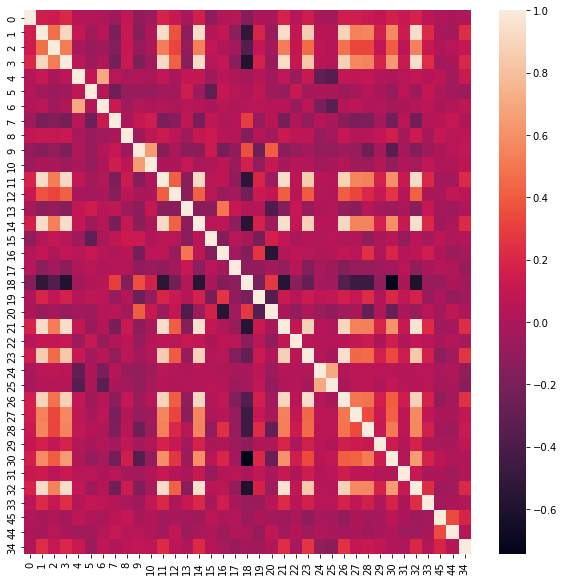

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

total_features = np.c_[ usable_features, usable_labels ]
print(total_features.shape)
print(num_features)
# column_list = list(range(num_features)) + [last_idx - 1, last_idx - 2, num_features ] 
column_list = feature_indices_to_consider + [num_features]
print( column_list )

df = pd.DataFrame(total_features, columns = column_list )
print( df.head() )

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
corr = df.corr()
sns.heatmap(corr)

In [43]:
print(corr)

          0         1         2         3         4         5         6   \
0   1.000000  0.149426  0.131046  0.209140  0.035876  0.023101  0.011842   
1   0.149426  1.000000  0.474469  0.897804  0.103005 -0.043165  0.046001   
2   0.131046  0.474469  1.000000  0.520402 -0.016817 -0.072167 -0.056615   
3   0.209140  0.897804  0.520402  1.000000  0.062634 -0.059105  0.014392   
4   0.035876  0.103005 -0.016817  0.062634  1.000000  0.079032  0.701927   
5   0.023101 -0.043165 -0.072167 -0.059105  0.079032  1.000000  0.033378   
6   0.011842  0.046001 -0.056615  0.014392  0.701927  0.033378  1.000000   
7  -0.066112 -0.193655 -0.165904 -0.220478  0.046436 -0.248222  0.114776   
8   0.088495  0.112492  0.103723  0.120008 -0.017574 -0.082061 -0.043843   
9  -0.104341 -0.158689 -0.090890 -0.186282  0.012632 -0.081805  0.021250   
10 -0.066179 -0.001702 -0.019780 -0.054025 -0.007200 -0.083185  0.002280   
11  0.179108  0.928457  0.523981  0.919129  0.083393 -0.049375  0.024381   
12  0.110442

In [44]:
print(corr.shape)
features_selected = []
# print(corr)
# print(usable_features)
print(num_features)
# print(column_list)
for i in column_list: 
#     print(corr[i][num_features])
#     print(i)
    if (corr[i][num_features] > 0.1 ) and i != num_features :
       # print(corr[i][num_features])
        if i < num_features :
            print(i, traits[i], corr[i][num_features])
        else:
            print(i, corr[i][num_features])
        features_selected.append(i)
print(features_selected)

(37, 37)
34
1 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No 0.22790416484817105
2 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year 0.10274367608348357
3 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year 0.19819294422434217
4 Total cholesterol 0.11907316665278112
11 Hearing difficulty/problems: Yes 0.21493809036800238
14 Hearing difficulty/problems with background noise 0.21275089843941372
21 Types of physical activity in last 4 weeks: Strenuous sports 0.2239978106211678
23 Loneliness, isolation 0.2627165004465577
26 Mood swings 0.24451057974521137
28 Non-cancer illness code, self-reported: stroke 0.11464274375091839
32 Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.20396671418211437
45 0.18496415340852124
[1, 2, 3, 4, 11, 14, 21, 23, 26, 28, 32, 45]


# For 6 years data

1 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No 0.24322385909859548

3 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year 0.21124628089025077

4 Total cholesterol 0.12352898692641824

9 systolic blood pressure 0.11864501660761692

11 Hearing difficulty/problems: Yes 0.20998441565381878
    
14 Hearing difficulty/problems with background noise 0.228985092105197

21 Types of physical activity in last 4 weeks: Strenuous sports 0.23538228660245308
    
23 Loneliness, isolation 0.2941195196720074

26 Mood swings 0.2699143146283435

28 Non-cancer illness code, self-reported: stroke 0.11703553736331215
    
32 Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.20821258728632597
    
45 Age - 0.19320066099872274

[1, 3, 4, 9, 11, 14, 21, 23, 26, 28, 32, 45]

# For 4 years data
1 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No 0.2370138227153033

2 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year 0.12301597556542748

3 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year 0.21769871588954318

11 Hearing difficulty/problems: Yes 0.2267182996133105

14 Hearing difficulty/problems with background noise 0.24139083496444005

21 Types of physical activity in last 4 weeks: Strenuous sports 0.24786173965876507

23 Loneliness, isolation 0.29639049781224136

26 Mood swings 0.2757687080856744

32 Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.22102020325282393

45 - Age - 0.19490563536656422

[1, 2, 3, 11, 14, 21, 23, 26, 32, 45]

# 6 years
[1, 3, 4, 9, 11, 14, 21, 23, 26, 28, 32, 45]

# 4 years
[1, 2, 3, 11, 14, 21, 23, 26, 32, 45]

In [45]:
print(num_features)
for i in range(num_features):
    for j in range(i + 1, num_features):
        if ( corr[i][j] > 0.9 ) and (i != j) :
            print(i, j, traits[i], traits[j], corr[i][j])
            if ( i in features_selected ) and ( j in features_selected ) :
                features_selected.remove(i)
print(features_selected)

34
1 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems: Yes 0.9284569327428832
1 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems with background noise 0.9299299109981074
1 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Types of physical activity in last 4 weeks: Strenuous sports 0.9295064668150488
1 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9297506871351562
3 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems: Yes 0.9191291471666234
3 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems with background 

# For 6 years Data
1 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems: Yes 0.9243604874070931

1 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems with background noise 0.9260716711328242

1 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Types of physical activity in last 4 weeks: Strenuous sports 0.9251902629480944

1 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9287006787768133

3 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems: Yes 0.916013760562386

3 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems with background noise 0.9285155282109617

3 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Types of physical activity in last 4 weeks: Strenuous sports 0.9354400293297891

3 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.933840388869314

11 14 Hearing difficulty/problems: Yes Hearing difficulty/problems with background noise 0.9069141055265667

11 21 Hearing difficulty/problems: Yes Types of physical activity in last 4 weeks: Strenuous sports 0.9337826472964724

11 32 Hearing difficulty/problems: Yes Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9269981637278939

14 21 Hearing difficulty/problems with background noise Types of physical activity in last 4 weeks: Strenuous sports 0.9501638611483937

14 26 Hearing difficulty/problems with background noise Mood swings 0.9112802611037611

14 32 Hearing difficulty/problems with background noise Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.949627270285899

21 32 Types of physical activity in last 4 weeks: Strenuous sports Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9548955650571679

23 26 Loneliness, isolation Mood swings 0.943306221921555


[4, 9, 26, 28, 32, 45]

# For 4 years

1 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems: Yes 0.9212724532317691

1 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems with background noise 0.9243097877929372

1 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Types of physical activity in last 4 weeks: Strenuous sports 0.9243532179243421

1 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.924561580278279

3 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems: Yes 0.9161945240953974

3 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems with background noise 0.9237643906928457

3 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Types of physical activity in last 4 weeks: Strenuous sports 0.9306475054407137

3 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9321867417573843

11 14 Hearing difficulty/problems: Yes Hearing difficulty/problems with background noise 0.904339215781919

11 21 Hearing difficulty/problems: Yes Types of physical activity in last 4 weeks: Strenuous sports 0.9305590439434829

11 32 Hearing difficulty/problems: Yes Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9265803183928989

14 21 Hearing difficulty/problems with background noise Types of physical activity in last 4 weeks: Strenuous sports 0.947395361264485

14 26 Hearing difficulty/problems with background noise Mood swings 0.9093575032593045

14 32 Hearing difficulty/problems with background noise Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9481628939479986

21 32 Types of physical activity in last 4 weeks: Strenuous sports Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9538671512897174

23 26 Loneliness, isolation Mood swings 0.9429904310440599


[2, 26, 32, 45]

# 6 years
[4, 9, 26, 28, 32, 45]

# 4 years
[2, 26, 32, 45]

Non-cancer illness code, self-reported: type 2 diabetes


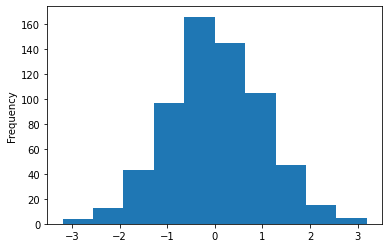

Ever had known person concerned about, or recommend reduction of, alcohol consumption: No


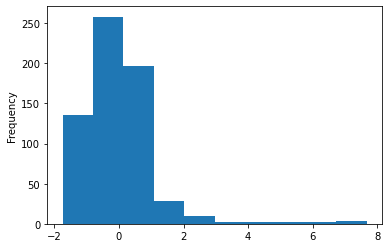

Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year


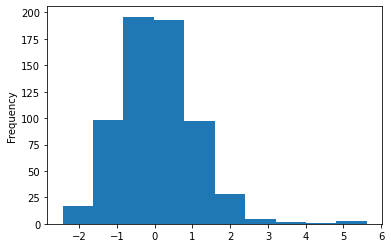

Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year


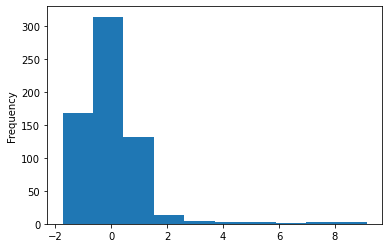

Total cholesterol


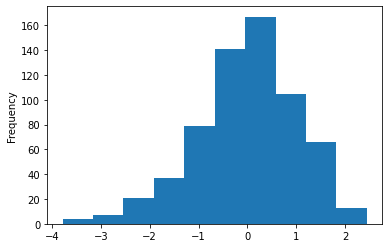

HDL cholesterol


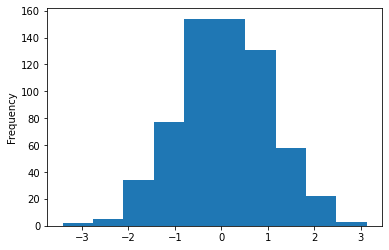

LDL cholesterol


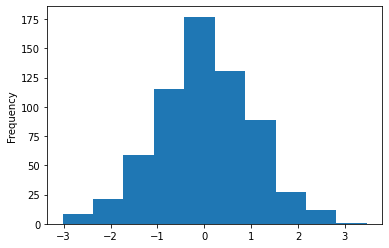

triglycerides


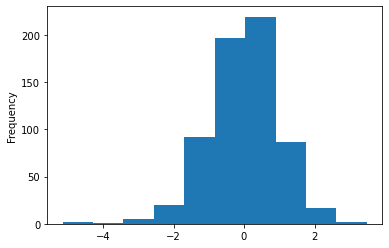

Cigarettes per Day


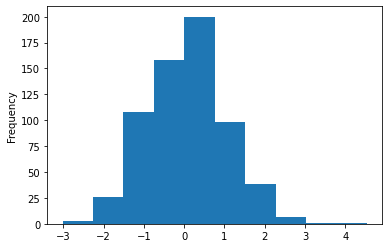

systolic blood pressure


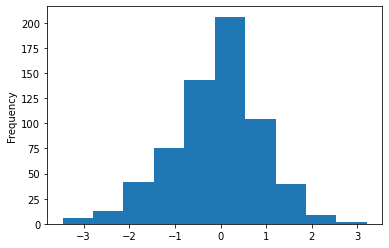

diastolic blood pressure


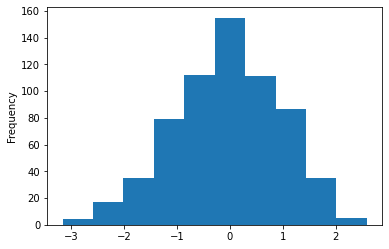

Hearing difficulty/problems: Yes


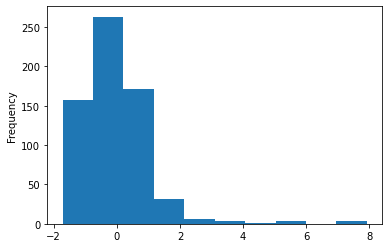

Non-cancer illness code, self-reported: depression


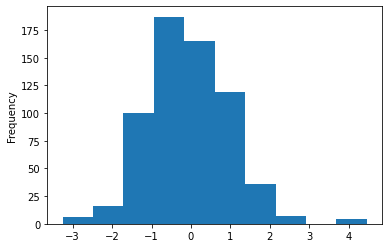

Non-oily fish intake


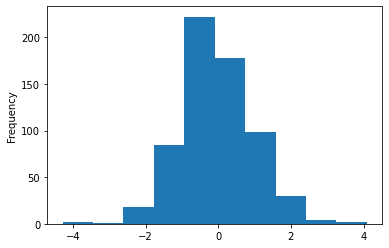

Hearing difficulty/problems with background noise


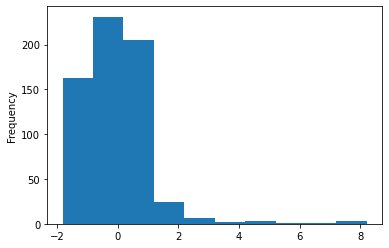

Body mass index (BMI)


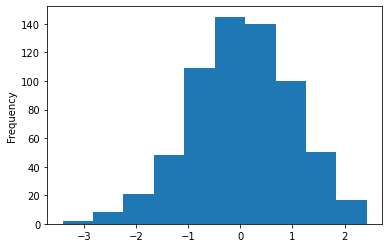

Oily fish intake


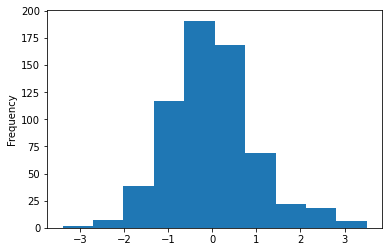

Sleeplessness / insomnia


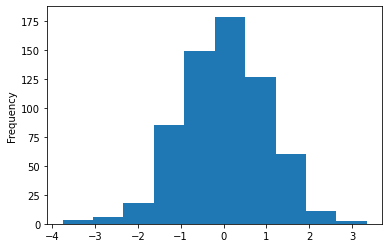

Sleep duration


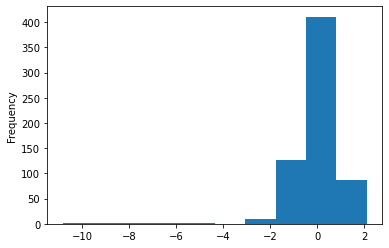

Age completed full time education


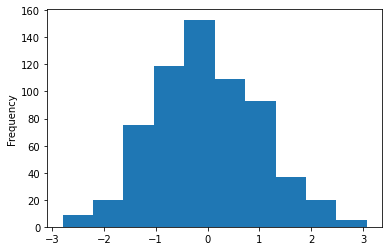

Processed meat intake


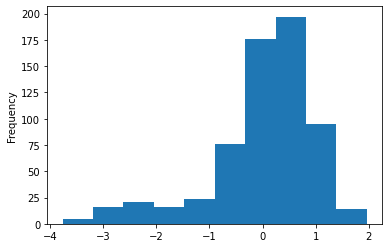

Types of physical activity in last 4 weeks: Strenuous sports


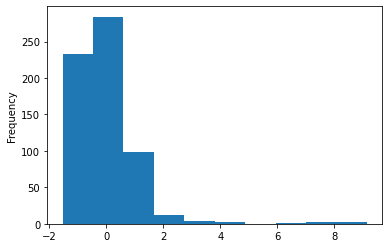

Other meat intake


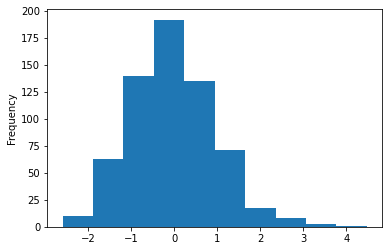

Loneliness, isolation


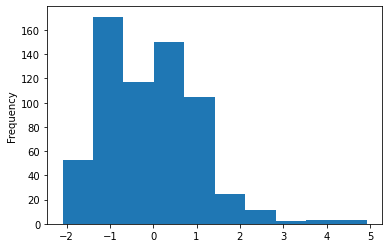

Illnesses of father: Alzheimer's disease/dementia


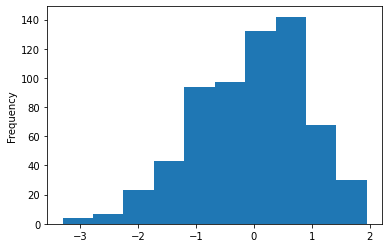

Illnesses of mother: Alzheimer's disease/dementia


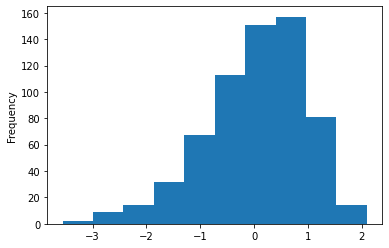

Mood swings


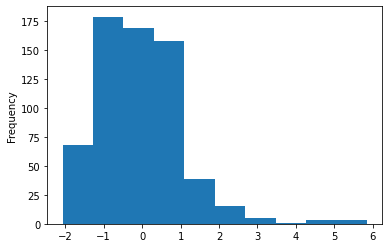

Non-cancer illness code, self-reported: anxiety/panic attacks


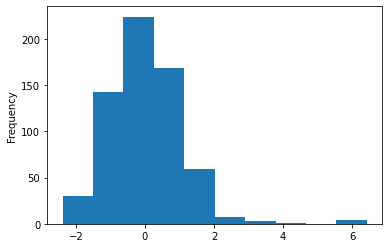

Non-cancer illness code, self-reported: stroke


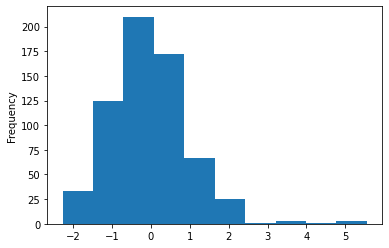

Non-cancer illness code, self-reported: head injury


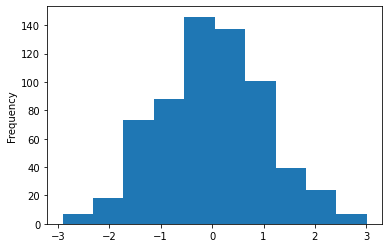

Alcohol intake frequency


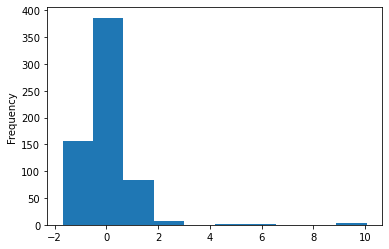

Diagnoses - secondary ICD10: E66.9 Obesity, unspecified


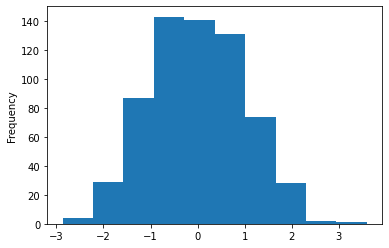

Non-cancer illness code, self-reported: hypothyroidism/myxoedema


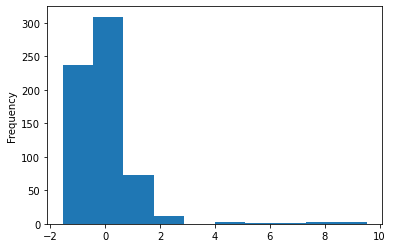

Non-cancer illness code, self-reported: hyperthyroidism/thyrotoxicosis


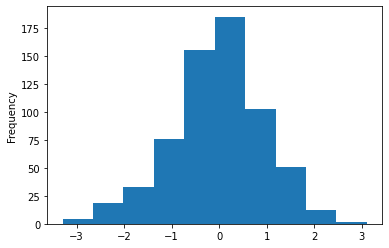

45


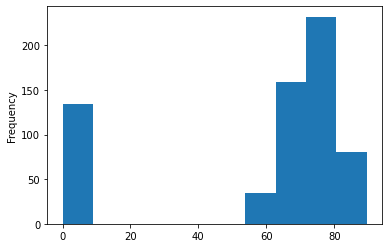

44


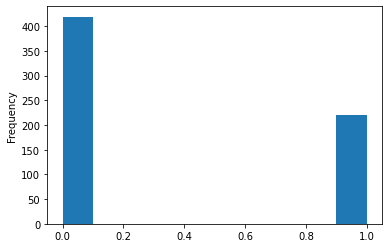

34


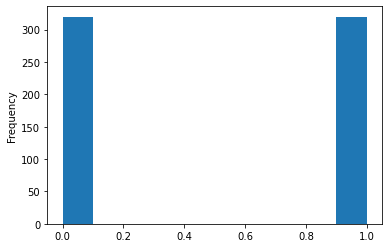

In [46]:
# print(df.head())
for i in column_list:
    if( i < len(traits) ):
        print(traits[i])
    else:
        print(i)
    df[i].plot(kind="hist")
    plt.show()

In [47]:
print(df[45].value_counts())

0.000000     134
74.300003      7
77.000000      6
72.599998      6
77.099998      6
            ... 
77.500000      1
88.400002      1
87.800003      1
75.199997      1
72.699997      1
Name: 45, Length: 227, dtype: int64


In [21]:
# get df with only negative values for ADNI
df_negative = df[df[34] == 0]
print(df_negative.shape)
print(df_negative.head())

(320, 37)
           0         1         2         3         4         5         6   \
320  0.854651 -0.782920 -0.857383 -0.471370  0.444673  0.973569  0.457760   
321  0.559150  0.360599  1.469037  0.263515  1.392147 -0.617502  1.050648   
322  0.096611  0.976351  1.449188  0.687595 -2.764302  0.574986 -0.185775   
323  1.189369  0.522386 -0.379310  0.460519 -1.176670 -0.239111 -1.790910   
324 -1.096946 -0.566075  0.088230 -0.812851  0.715146 -0.422891 -0.211144   

           7         8         9   ...        27        28        29  \
320  0.214627 -0.883566  0.288172  ... -1.351960 -0.753868  0.751419   
321  1.341838  1.178842 -1.783959  ... -0.625117 -1.906565  1.682978   
322  0.992830  1.696414 -0.471784  ...  0.163258 -0.229584  1.464586   
323 -0.505058  0.112853  0.129561  ...  1.432482  0.075026  1.928175   
324 -0.400284 -0.761155  0.395644  ...  0.938417  0.517963  0.962737   

           30        31        32        33         45   44   34  
320 -0.488166 -1.545470 -1.

In [22]:
df_negative[45].value_counts()

0.000000     88
77.900002     5
72.599998     5
65.099998     4
71.400002     4
             ..
67.000000     1
65.599998     1
67.400002     1
76.300003     1
66.000000     1
Name: 45, Length: 150, dtype: int64

In [23]:
# get df with only positive values for ADNI
df_positive = df[df[34] == 1]
print(df_positive.shape)
print(df_positive.head())

(320, 37)
         0         1         2         3         4         5         6   \
0  0.908123 -0.274074  0.758874  0.013049  0.442983 -0.443285  1.485292   
1  1.020274 -0.369848  0.150669 -0.581045 -2.227744  0.108810 -0.931956   
2  0.313621  0.717114 -1.276234  0.384302  0.151542 -1.449305 -0.555103   
3 -0.306784 -0.220525 -0.449427 -0.965876  0.389096  1.208160 -0.549053   
4 -0.011817  0.625900  0.424598  0.374737 -1.037671 -1.432151 -0.425815   

         7         8         9   ...        27        28        29        30  \
0 -0.082247  1.043784 -0.912264  ... -0.462970 -0.664790 -0.669290  0.469373   
1  1.036111 -0.010686 -0.175580  ... -0.745343 -0.156196  2.643934 -0.245744   
2  0.186433  0.280066  1.539513  ...  1.360584 -0.224199  1.224479 -0.188662   
3  0.003970  0.283371 -0.218040  ...  0.162651  1.141808  1.471753 -0.254233   
4  1.823026  0.615346  0.806600  ... -1.019009 -0.428521  2.298245  0.164348   

         31        32        33         45   44   34  
0 -

In [24]:
df_positive[45].value_counts()

0.000000     45
79.300003     6
68.000000     4
79.800003     4
72.199997     4
             ..
56.500000     1
88.300003     1
72.800003     1
59.700001     1
73.699997     1
Name: 45, Length: 172, dtype: int64